## Project 1 pilot study

In [54]:
# load all the packages and libraries going to be used
%pylab inline
from mvpa2.suite import *
import os.path as op
import sklearn
import seaborn as sns
from pywt import wavedecn
from scipy import stats
from mpl_toolkits import mplot3d

Populating the interactive namespace from numpy and matplotlib


/anaconda3/envs/py2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['copy', 'axes', 'product', 'vstack', 'deprecated', 'seed', 'random', 'ceil', 'hist', 'clf', 'chisquare', 'add', 'save', 'test', 'matshow', 'hstack', 'lstsq', 'argsort', 'log10', 'info', 'floor']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [55]:
# First, let's load fMRI data, 4 runs
bold_fname = ('test.2.nii','test.4.nii','test.6.nii','test.8.nii')

chunks = np.zeros (320)
chunks[:80]=1
chunks[80:160]=2
chunks[160:240]=3
chunks[240:320]=4

ds= fmri_dataset(bold_fname)
print 'sample_number=',len(ds)  # check how many samples or volumes;
print'feature_number=',ds.nfeatures # check how many feature are there;
print'data_info=',ds.shape # check teh 2-dimensianl dataset info;

sample_number= 320
feature_number= 152256
data_info= (320, 152256)


In [56]:
# Load in the mask of the ROI
mask_fname=('masktest.nii')# right IPS
ds = fmri_dataset (bold_fname, mask=mask_fname)
print 'sample_number=',len(ds)  # check how many samples or volumes;
print'feature_number=',ds.nfeatures # check how many feature being used;
print'data_info=',ds.shape # check teh 2-dimensianl dataset info;

sample_number= 320
feature_number= 92
data_info= (320, 92)


In [57]:
# explore the dataset attributes
print 'TR_index=', ds.sa.time_indices[:5]
print 'Actual time of TR=', ds.sa.time_coords[:5]
print 'ori_voxel_feature=', ds.fa.voxel_indices[:5] # The first five feature, we can see the spatial info is preseverd!
print 'voxel_size=', ds.a.voxel_eldim
print 'volumes_dim=', ds.a.voxel_dim

TR_index= [0 1 2 3 4]
Actual time of TR= [0. 2. 4. 6. 8.]
ori_voxel_feature= [[31 44 35]
 [31 45 35]
 [31 46 32]
 [32 44 31]
 [32 44 34]]
voxel_size= (3.125, 3.125, 3.125)
volumes_dim= (52, 61, 48)


In [58]:
ds.a.mapper # Since the the most important feature of this toolbox is everything
            # can be reversed back. why? Becaused everything has been recored! How cool 
            # is that!
# stripped = ds.copy(deep=False, sa=['time_coords'],fa=[],a=[])
# Print stripped
# Having all these attributes being part of a dataset is often a useful thing to have, but in some cases (e.g. when it
# comes to efficiency, and/or very large datasets) one might want to have a leaner dataset with just the information
# that is really necessary. One way to achieve this, is to strip all unwanted attributes. The Dataset class’ copy()
# method can help with that.

ChainMapper(nodes=[FlattenMapper(shape=(52, 61, 48), auto_train=True, space='voxel_indices'), StaticFeatureSelection(dshape=(152256,), slicearg=array([False, False, False, ..., False, False, False]))])

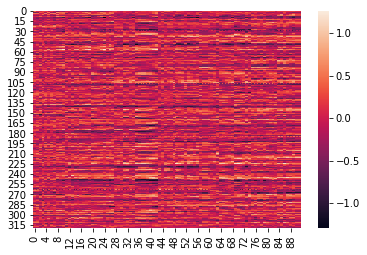

In [59]:
np.mean(ds)
sns.heatmap(ds)

In [60]:
# Load in the condition label file
conditions=np.loadtxt('test.csv',delimiter=',')
# cond_labels_shifted = np.zeros(cond_labels.shape)
# cond_labels_shifted[2:] = cond_labels[:-2]
# return cond_labels_shifted

In [61]:
ds = fmri_dataset (bold_fname, mask=mask_fname, targets= conditions, chunks=chunks)
print ds.summary()

Dataset: 320x92@float32, <sa: chunks,targets,time_coords,time_indices>, <fa: voxel_indices>, <a: imgaffine,imghdr,imgtype,mapper,voxel_dim,voxel_eldim>
stats: mean=1.20251e-05 std=0.325821 var=0.10616 min=-1.29398 max=1.26347

Counts of targets in each chunk:
  chunks\targets 0.0 1.0 2.0 3.0 4.0
                 --- --- --- --- ---
       1.0        56  6   6   6   6
       2.0        56  6   6   6   6
       3.0        56  6   6   6   6
       4.0        56  6   6   6   6

Summary for targets across chunks
  targets mean std min max #chunks
    0      56   0   56  56    4
    1       6   0   6   6     4
    2       6   0   6   6     4
    3       6   0   6   6     4
    4       6   0   6   6     4

Summary for chunks across targets
  chunks mean std min max #targets
    1     16   20  6   56     5
    2     16   20  6   56     5
    3     16   20  6   56     5
    4     16   20  6   56     5
Sequence statistics for 320 entries from set [0.0, 1.0, 2.0, 3.0, 4.0]
Counter-balance table f

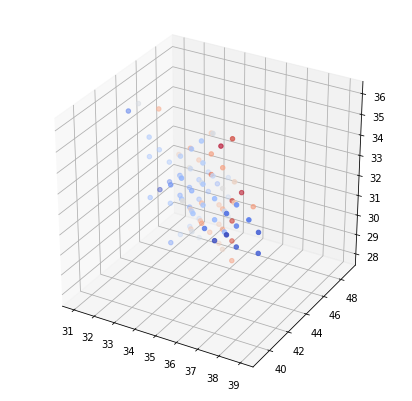

In [62]:
fig = plt.figure(figsize= (7,7))
ax = plt.axes(projection='3d')
vol=ds.fa.voxel_indices
x = vol[:,0]
y = vol[:,1]
z = vol[:,2]
ax.scatter3D(x,y,z, c= np.ravel(ds[0,:]),cmap='coolwarm') #ravel to conpress; Let's look at the first TR with 92 TR
# Good demonstration that spatial info can be preserved

1 = words

2 = faces

3 = tools/shapes

4 = numbers

In [63]:
words = ds.targets == 1
faces = ds.targets == 2
shapes = ds.targets == 3
numbers = ds.targets == 4

In [64]:
words_allTR = ds[words,:]
faces_allTR = ds[faces,:]
shapes_allTR = ds[shapes,:]
numbers_allTR = ds[numbers,:]
words_mean = np.mean(words_allTR,axis=0)
faces_mean = np.mean(faces_allTR,axis=0)
shapes_mean = np.mean(shapes_allTR,axis=0)
numbers_mean = np.mean(numbers_allTR,axis=0)

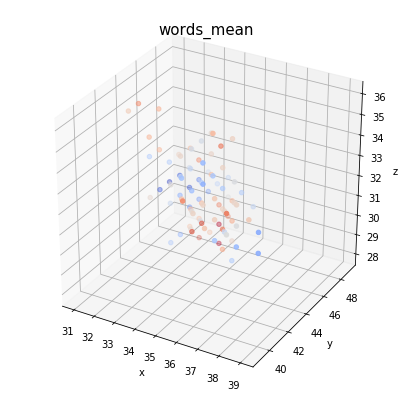

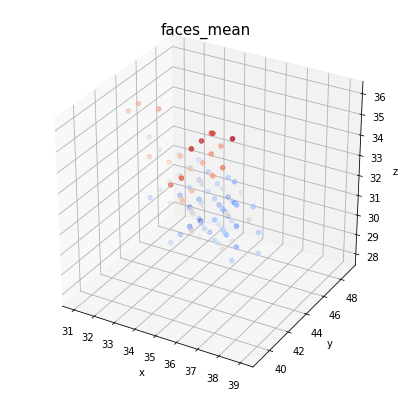

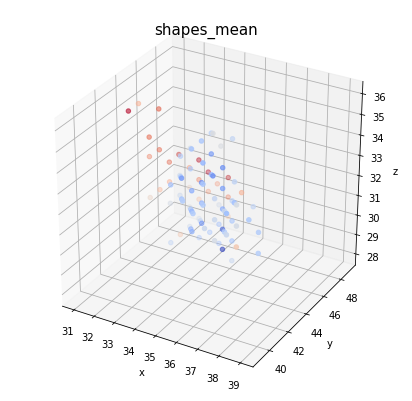

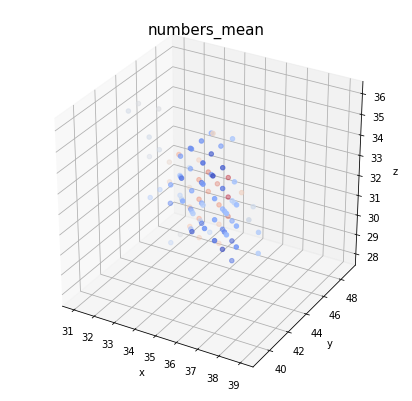

In [65]:
vol=ds.fa.voxel_indices
x = vol[:,0]
y = vol[:,1]
z = vol[:,2]

# Here I ploted four objects, each one has many pictures, so we goanna look at the mean pic of each.
cantlon = [words_mean,faces_mean,shapes_mean,numbers_mean]
cantlon_titles = ["words_mean","faces_mean","shapes_mean","numbers_mean"]

for i in range(len(cantlon)):
    fig = plt.figure(figsize= (7,7))
    ax = plt.axes(projection='3d')
    ax.scatter3D(x,y,z, c= np.ravel(cantlon[i]),cmap='coolwarm')
    ax.set_title (cantlon_titles[i],fontsize=15)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    

Text(0,0.5,'y')

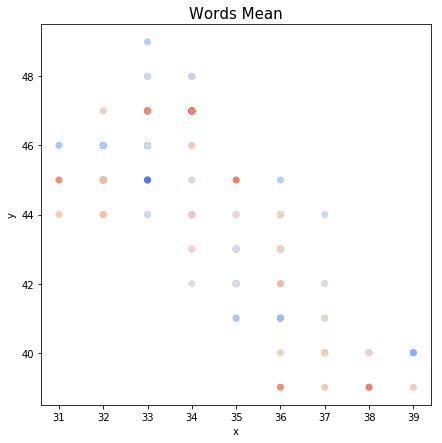

In [66]:
# 3D project to 2D
fig = plt.figure(figsize= (7,7))
ax = plt.axes()
vol=ds.fa.voxel_indices
x = vol[:,0]
y = vol[:,1]
z = vol[:,2]
ax.scatter(x,y, c= np.ravel(words_mean),cmap='coolwarm') #take all 
ax.set_title ('Words Mean',fontsize=15)
ax.set_xlabel("x")
ax.set_ylabel("y")
#ax.set_zlabel("z")

In [67]:
orig_data = ds.a.mapper.reverse(ds.samples)
m = fmri_dataset('masktest.nii')

In [68]:
orig_mask = m.a.mapper.reverse(m.samples)

In [69]:
orig_mask.shape

(1, 52, 61, 48)

In [70]:
orig_data.shape

(320, 52, 61, 48)

In [71]:
new_data = orig_mask * orig_data

In [72]:
new_data.shape[0]

320

In [73]:
sum_var_all=[]
# loop over TR
for i in range(new_data.shape[0]):
    TR=new_data[i,:,:,:]
    coeff = pywt.wavedecn(TR, 'haar')
    len(coeff)
    len(coeff[-1])

    sum_var=[]
    
    for j in range(len(coeff)-1):
        level=j+1
        # coeff[-level] is now a dictionary
        aad = coeff[-level]['aad']
        ada = coeff[-level]['ada']
        daa = coeff[-level]['daa']
        add = coeff[-level]['aad']
        dad = coeff[-level]['dad']
        dda = coeff[-level]['dda']
        ddd = coeff[-level]['ddd']
        sum_var.append(aad.var() +ada.var() +daa.var()+add.var() +dad.var() +dda.var()+ddd.var())
    sum_var_all.append(sum_var)
print 'sum var for all TRs=',sum_var_all # each numer describes the new feature for each level, then we have 5 new features based one 5 levels.

sum var for all TRs= [[0.0005188766, 0.0009147145, 0.0040790644, 0.0109107625, 0.010541253], [0.00053188903, 0.00093790586, 0.0042368257, 0.011346931, 0.0109735895], [0.00013392293, 0.0004357093, 0.000667059, 0.0004176509, 0.00061960303], [0.00028961076, 0.0007430151, 0.0012824453, 0.0013431988, 0.0009767241], [0.00022853877, 0.00039686554, 0.0008752978, 0.00072766835, 0.0005798696], [0.00026627147, 0.00068751327, 0.0012538355, 0.0019652979, 0.0019951009], [0.00022160685, 0.0005536457, 0.0017391663, 0.001288113, 0.0007914749], [0.0003948406, 0.0009229162, 0.003294757, 0.004984226, 0.0034465247], [0.00041101393, 0.0007685436, 0.0030466206, 0.0034943325, 0.0026074932], [0.00045720732, 0.0012043866, 0.0030080767, 0.0048306338, 0.0059341867], [0.0010098345, 0.001764367, 0.011600478, 0.02632503, 0.032780413], [0.0001871971, 0.00028137706, 0.0004560667, 9.545686e-05, 7.488693e-05], [0.000270937, 0.00043028273, 0.0019428105, 0.003442429, 0.0025606162], [0.00025593475, 0.00042276038, 0.0032322

Text(0.5,1,'Distances: z-scored, detrended (sorted by targets)')

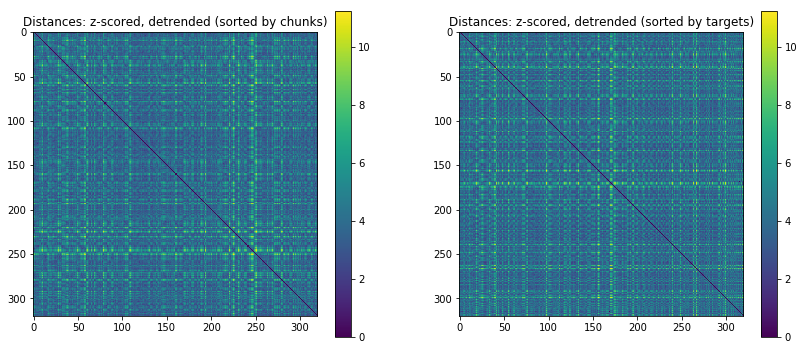

In [74]:
pl.figure(figsize=(14, 6))
pl.subplot(121)
plot_samples_distance(ds, sortbyattr='chunks')
pl.title('Distances: z-scored, detrended (sorted by chunks)')
pl.subplot(122)
plot_samples_distance(ds, sortbyattr='targets')
pl.title('Distances: z-scored, detrended (sorted by targets)')

In [75]:
#preprocessing
poly_detrend(ds, polyord=1, chunks_attr='chunks')
zscore(ds, param_est=('targets', [0]))
ds = ds[ds.sa.targets != 0]

Text(0.5,1,'Distances: z-scored, detrended (sorted by targets)')

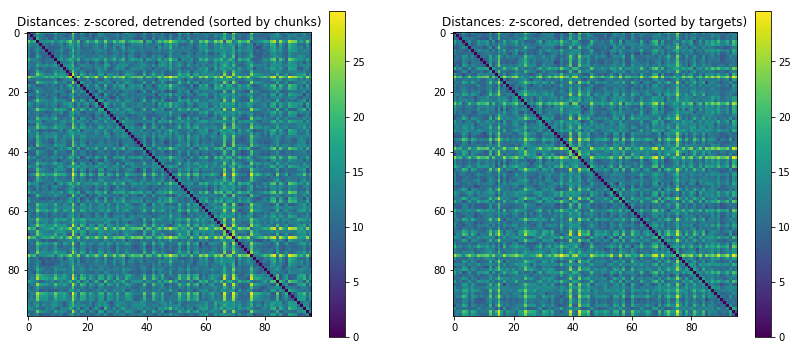

In [76]:
pl.figure(figsize=(14, 6))
pl.subplot(121)
plot_samples_distance(ds, sortbyattr='chunks')
pl.title('Distances: z-scored, detrended (sorted by chunks)')
pl.subplot(122)
plot_samples_distance(ds, sortbyattr='targets')
pl.title('Distances: z-scored, detrended (sorted by targets)')

In [77]:
clf = kNN(k=1, dfx=one_minus_correlation, voting='majority')
cvte = CrossValidation(clf, NFoldPartitioner(),errorfx=lambda p, t: np.mean(p == t))
cv_results = cvte(ds)
print 'Mean accuracy KNN_Orig=', np.mean(cv_results)
print
# test the significance
t, p = stats.ttest_1samp(cv_results,.25)
print 't_value=', t
print 'p_value_orig=', p
print
print 'Accuracy for each run=', cv_results.samples

Mean accuracy KNN_Orig= 0.27083333333333337

t_value= [0.48038446]
p_value_orig= [0.66380801]

Accuracy for each run= [[0.29166667]
 [0.25      ]
 [0.16666667]
 [0.375     ]]


## Define the function to capture the spreadness of our data. 

In [78]:
ds = fmri_dataset(bold_fname, mask=mask_fname, targets=conditions, chunks=chunks)
print ds.summary()

Dataset: 320x92@float32, <sa: chunks,targets,time_coords,time_indices>, <fa: voxel_indices>, <a: imgaffine,imghdr,imgtype,mapper,voxel_dim,voxel_eldim>
stats: mean=1.20251e-05 std=0.325821 var=0.10616 min=-1.29398 max=1.26347

Counts of targets in each chunk:
  chunks\targets 0.0 1.0 2.0 3.0 4.0
                 --- --- --- --- ---
       1.0        56  6   6   6   6
       2.0        56  6   6   6   6
       3.0        56  6   6   6   6
       4.0        56  6   6   6   6

Summary for targets across chunks
  targets mean std min max #chunks
    0      56   0   56  56    4
    1       6   0   6   6     4
    2       6   0   6   6     4
    3       6   0   6   6     4
    4       6   0   6   6     4

Summary for chunks across targets
  chunks mean std min max #targets
    1     16   20  6   56     5
    2     16   20  6   56     5
    3     16   20  6   56     5
    4     16   20  6   56     5
Sequence statistics for 320 entries from set [0.0, 1.0, 2.0, 3.0, 4.0]
Counter-balance table f

In [79]:
def cal_R_sq (v_i,x_i,y_i,z_i):
    """Define the function that is gonna be used for the feature extration"""
    x_c = sum(np.abs(v_i)*x_i)/sum(np.abs(v_i))
    y_c = sum(np.abs(v_i)*y_i)/sum(np.abs(v_i))
    z_c = sum(np.abs(v_i)*z_i)/sum(np.abs(v_i))
    R_2 = sum(((x_i-x_c)**2+(y_i-y_c)**2)*np.abs(v_i))/sum(np.abs(v_i))
    return R_2

In [80]:
# turn the list above into array
new_five_feature = np.asarray(sum_var_all)
data_five_feature = np.hstack([ds, new_five_feature])
# Create a new dataset after adding in the additional label
ds_new = dataset_wizard(data_five_feature, targets=conditions, chunks=chunks)
ds_new.shape
print ds.shape
print new_five_feature.shape

(320, 92)
(320, 5)


In [90]:
print new_five_feature

[[0.00051888 0.00091471 0.00407906 0.01091076 0.01054125]
 [0.00053189 0.00093791 0.00423683 0.01134693 0.01097359]
 [0.00013392 0.00043571 0.00066706 0.00041765 0.0006196 ]
 ...
 [0.00042525 0.00121851 0.00514525 0.01116006 0.01149264]
 [0.00014561 0.00017313 0.00089134 0.00065707 0.00055112]
 [0.00013772 0.00043307 0.00101027 0.00187969 0.00276922]]


Text(0.5,1,'Distances: z-scored, detrended (sorted by targets)')

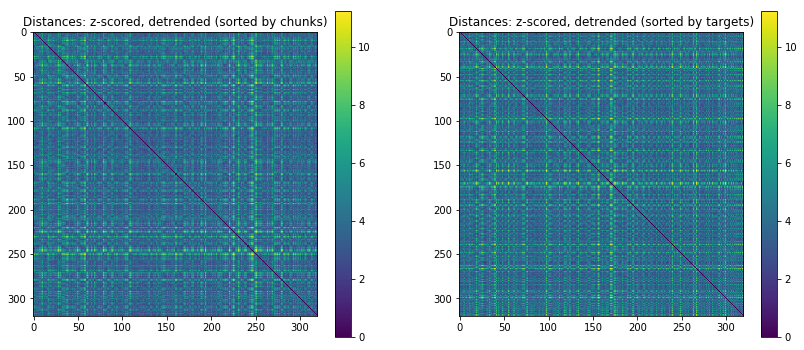

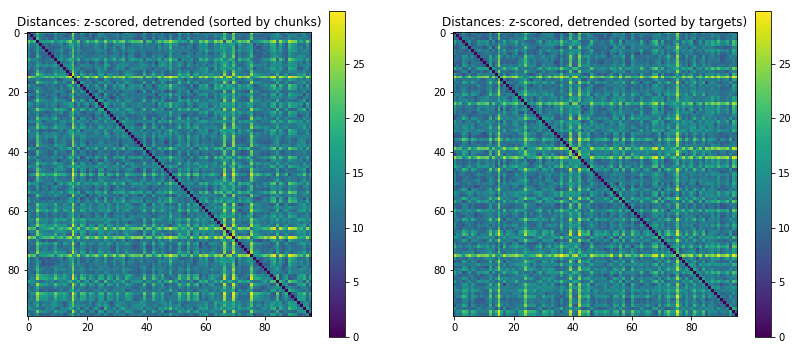

In [81]:
pl.figure(figsize=(14, 6))
pl.subplot(121)
plot_samples_distance(ds_new, sortbyattr='chunks')
pl.title('Distances: z-scored, detrended (sorted by chunks)')
pl.subplot(122)
plot_samples_distance(ds_new, sortbyattr='targets')
pl.title('Distances: z-scored, detrended (sorted by targets)')

#preprocessing on the dataset with new features
poly_detrend(ds_new, polyord=1, chunks_attr='chunks')
zscore(ds_new, param_est=('targets', [0]))
ds_new = ds_new[ds_new.sa.targets != 0]

pl.figure(figsize=(14, 6))
pl.subplot(121)
plot_samples_distance(ds_new, sortbyattr='chunks')
pl.title('Distances: z-scored, detrended (sorted by chunks)')
pl.subplot(122)
plot_samples_distance(ds_new, sortbyattr='targets')
pl.title('Distances: z-scored, detrended (sorted by targets)')

In [82]:
# Classification based on new feature added
clf = kNN(k=1, dfx=one_minus_correlation, voting='majority')
cvte = CrossValidation(clf, NFoldPartitioner(),errorfx=lambda p, t: np.mean(p == t))
cv_new_results = cvte(ds_new)
print 'Mean Accuracy KNN_new=', np.mean(cv_new_results)
# Test the results significance
print
t_new, p_new = stats.ttest_1samp(cv_new_results,.25)
print 't_new_value=', t_new
print 'p_new_value=', p_new
print
print 'Accuracy for each run=', cv_new_results.samples

Mean Accuracy KNN_new= 0.2916666666666667

t_new_value= [0.81649658]
p_new_value= [0.47402139]

Accuracy for each run= [[0.33333333]
 [0.20833333]
 [0.20833333]
 [0.41666667]]


In [83]:
# Try different classifers-SVM
clf = LinearCSVMC()
cvte = CrossValidation(clf, NFoldPartitioner(),errorfx=lambda p, t: np.mean(p == t))
cv_results_svm= cvte(ds_new)
print 'Mean accuracy SVM=',np.mean(cv_results_svm)
print
# Test the results significance
t_new_svm, p_new_svm= stats.ttest_1samp(cv_new_results,.25)
print
print 't_new_value_svm=', t_new_svm
print 'p_new_value_svm=', p_new_svm

Mean accuracy SVM= 0.25


t_new_value_svm= [0.81649658]
p_new_value_svm= [0.47402139]


In [84]:
# Try different classifers-GNB
clf = GNB()
cvte = CrossValidation(clf, NFoldPartitioner(),errorfx=lambda p, t: np.mean(p == t))
cv_results_gnb= cvte(ds_new)
print 'Mean accuracy GNB=',np.mean(cv_results_gnb)
print
# Test the results significance
t_new_gnb, p_new_gnb= stats.ttest_1samp(cv_results_gnb,.25)
print
print 't_new_value_gnb=', t_new_gnb
print 'p_new_value_gnb=', p_new_gnb

Mean accuracy GNB= 0.25


t_new_value_gnb= [0.]
p_new_value_gnb= [1.]


In [85]:
# a= fmri_dataset('IPS_mask.nii')
# a.samples[:,a.fa['voxel_indices'][:,0] < 25] = 0
# nimg = map2nifti(a)
# nimg.to_filename('masktest.nii')

In [86]:
a= fmri_dataset('IPS_mask.nii')
#a.samples[:,a.fa['voxel_indices'][:,0] < 25] = 0
#nimg = map2nifti(a)
#nimg.to_filename('masktest.nii')
# plt.hist(a.samples)

In [87]:
a.samples

memmap([[0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [88]:
np.sum(a.samples == 2)

0

In [89]:
np.sum(a.samples == 1)

199